# 导入依赖

In [53]:
import os
import sys
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent))

import PIL.Image as pil_img

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

from transforms import build_train_transform, build_test_transfrom

# 加载 demo 图片

In [2]:
img_p = "./demo_image.JPEG"
img = cv2.imread(img_p)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(332, 500, 3)

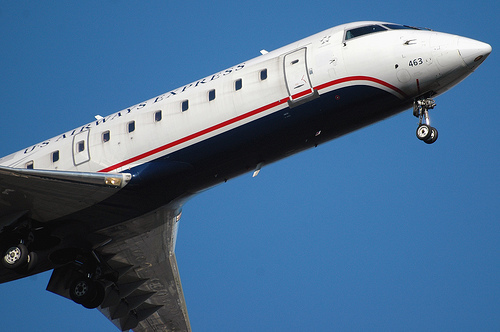

In [3]:
img_pil = pil_img.fromarray(img)
img_pil

# 创建 transforms

In [4]:
train_transforms = build_train_transform(
    torch.as_tensor([0.48023694, 0.44806704, 0.39750364]),
    torch.as_tensor([0.22953526, 0.22623344, 0.22549918]),
    torch.as_tensor([
        [-0.56616026, -0.72411767, 0.3938479],
        [-0.5837257, 0.01484647, -0.81181518],
        [-0.58200246, 0.68951663, 0.43109158]
    ]),
    torch.as_tensor([0.20419837, 0.01972287, 0.00413188])
)

test_transforms = build_test_transfrom(
    torch.as_tensor([0.48023694, 0.44806704, 0.39750364]),
    torch.as_tensor([0.22953526, 0.22623344, 0.22549918]),
)

# Demo train transforms

In [9]:
train_transforms

Compose(
    ToTensor()
    Normalize(mean=tensor([0.4802, 0.4481, 0.3975]), std=tensor([0.2295, 0.2262, 0.2255]))
    ShortEdgeResize()
    CenterCrop(size=(256, 256))
    RandomCrop(size=(224, 224), padding=None)
    RandomHorizontalFlip(p=0.5)
    PCARandomNoise()
)

In [5]:
img_trans = train_transforms(img)
img_trans.shape

torch.Size([1, 3, 224, 224])

In [6]:
channel_mean = np.asarray([0.48023694, 0.44806704, 0.39750364]).reshape(3, 1, 1)
channel_std = np.asarray([0.22953526, 0.22623344, 0.22549918]).reshape(3, 1, 1)

img_trans = np.asarray(img_trans[0]) * channel_std + channel_mean
img_trans = (img_trans * 255).astype(np.uint8)
img_trans = np.transpose(img_trans, (1, 2, 0))
img_trans.shape

(224, 224, 3)

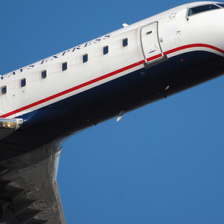

In [7]:
img_trans_pil = pil_img.fromarray(img_trans)
img_trans_pil

# Demo test transforms

In [10]:
test_transforms

Compose(
    ToTensor()
    Normalize(mean=tensor([0.4802, 0.4481, 0.3975]), std=tensor([0.2295, 0.2262, 0.2255]))
    ShortEdgeResize()
    StackHorizontalFlip()
    StackCornerCenterCrop()
)

In [11]:
img_trans = test_transforms(img)
img_trans.shape

torch.Size([10, 3, 224, 224])

In [12]:
channel_mean = np.asarray([0.48023694, 0.44806704, 0.39750364]).reshape(1, 3, 1, 1)
channel_std = np.asarray([0.22953526, 0.22623344, 0.22549918]).reshape(1, 3, 1, 1)

img_trans = np.asarray(img_trans) * channel_std + channel_mean
img_trans = (img_trans * 255).astype(np.uint8)
img_trans = np.transpose(img_trans, (0, 2, 3, 1))
img_trans.shape

(10, 224, 224, 3)

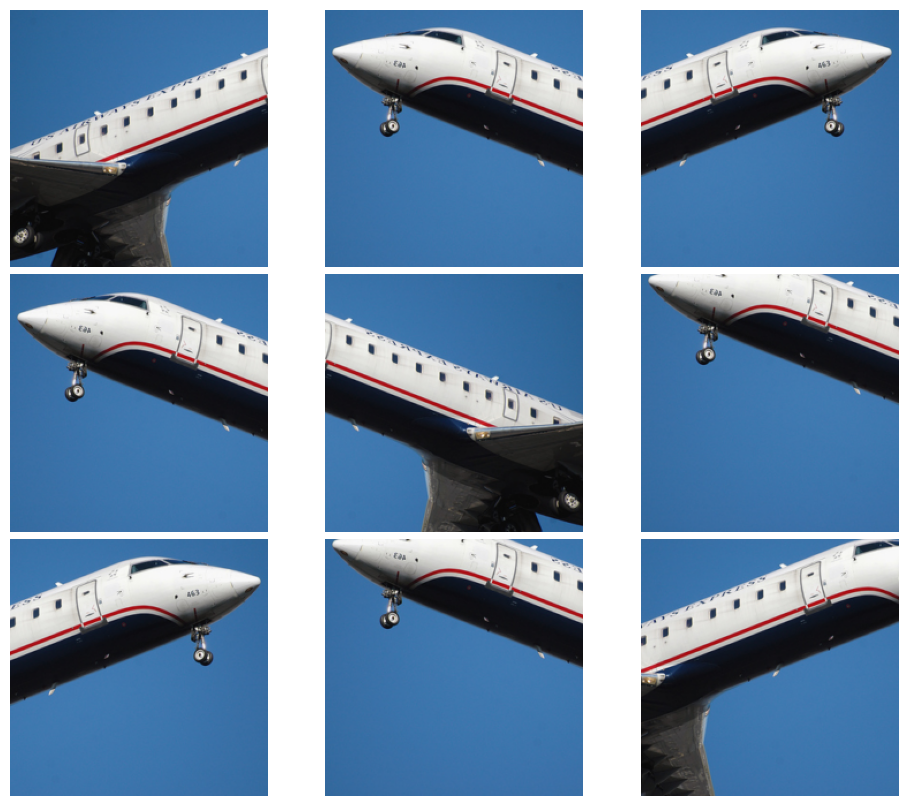

In [55]:
fig, axs = plt.subplots(3, 3, figsize = (10, 8))

for i in range(3):
    for j in range(3):
        img_display = img_trans[(i + 1) * (j + 1) - 1, :]
        ax = axs[i, j]
        ax.imshow(img_display)
        ax.axis("off")

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.show()